In [22]:
import math

class Point:
    @property
    def x(self):
        return self.coords[0]
    
    @x.setter
    def x(self, value):
        self.coords[0] = value

    @property
    def y(self):
        return self.coords[1]
    
    @y.setter
    def y(self, value):
        self.coords[0] = value


    def __init__(self, x, y):
        self.coords = [x, y]

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)
    
    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)
    
    def __mul__(self, value):
        return Point(self.x * value, self.y * value)

    def __truediv__(self, value):
        return Point(self.x / value, self.y / value)

    def __getitem__(self, i):
        return self.coords[i]

    def __setitem__(self, i, value):
        self.coords[i] = value

    def __abs__(self):
        return self.magnitude()
    
    def __str__(self):
        return f"({self.x}, {self.y})"

    def magnitude(self):
        return math.sqrt(self.x * self.x + self.y * self.y)
    
    def normalized(self):
        return self / self.magnitude()

In [76]:
def golden_section_search(f, a, b, tol = 1e-10, itmax = 10):
    phi = 1 / ((1 + math.sqrt(5)) / 2)
    z = 0.381966

    zl = (b - a) * phi
    c, d = b - zl, a + zl

    while (c - d).magnitude() > tol:
        b, a = (d, a) if f(c) < f(d) else (b, c)
        zl = (b - a) * phi
        c, d = b - zl, a + zl

    return (a + b)*(1/2)

f = lambda x: ((x[0] - 2) ** 2 + 1)
min_x = golden_section_search(f, Point(0, 4), Point(4, 9))
print(min_x)


(2.000000010502526, 6.500000013128156)


In [78]:
from math import sin
import matplotlib.pyplot as plt

p = Point(-2, 3)

def hooke_jeeves(fn, start: Point, epsilon = 0.001):
    next = start
    cur = start

    # Search area for improving the point
    step = 1.0

    # Show starting point
    plt.scatter(start[0], start[1])

    # Run for 50 iterations
    for i in range(100):
        # Here we improve the point
        # For each direction
        for n in range(0, 2):
            dir = Point(0, 0)
            dir[n] = 1
            
            # Find the smallest point in one direction
            next = golden_section_search(fn, next - dir * step, next + dir * step, epsilon)

        # Show where we are
        plt.scatter(next[0], next[1], marker=(5, 0))

        # If we moved by a really small number, we are done
        if (next - cur).magnitude() < epsilon:
            return next # huraaa
        else:
            # Phase 2
            # The approximation vector, going from previous to our new, improved vector
            direction = (next - cur)
            # Find the smallest value along the way
            alpha = golden_section_search(fn, next - direction * step, next + direction * step, epsilon)
            # Move the points
            cur = next
            next = alpha
    return next


In [86]:
import numpy as np

def f(x, y):
    #return (x-2)**2 + (y-3)**2 + np.sin(2*np.pi*x)*np.sin(2*np.pi*y)
    return (x + y)**2 + (np.sin(x + 2))**2 + y**2 + 10

(0.7314036622489545, -0.365701801090086)


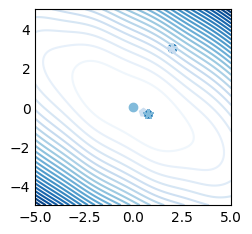

In [87]:

import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-5, 5, 256), np.linspace(-5, 5, 256))
Z = f(X,Y)
levels = np.linspace(np.min(Z), np.max(Z), 25)

# plot
fig, ax = plt.subplots()

ax.contour(X, Y, Z, levels=levels)
plt.scatter(2, 3)

result = hooke_jeeves(lambda x: f(x[0], x[1]), Point(0, 0), 1e-10)

plt.scatter(result[0], result[1], marker=(5, 2))
plt.scatter(2, 3, marker=(5, 2))
print(result)

plt.show()

In [ ]:
def fn(p):
    return (p+3)**4
    """ x, y = p.x, p.y
    return x**3 """

test = golden(fn, -1, 1, 0.00001)
print(-1 - test)


Interval (-1,-0.9574275212959916)
-0.021286239352004133
